In [1]:
# libreries for pre-processing 
import numpy                      as np
import matplotlib.pyplot          as plt
import pandas                     as pd
from   sklearn.model_selection    import KFold
from   sklearn.impute             import SimpleImputer
from sklearn.preprocessing        import LabelEncoder
import os
# ciao
# libreries for pre-Machine Learning 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, MinMaxScaler
from sklearn.decomposition   import PCA

# libreries for Machine Learning 
from sklearn.svm                import SVC
from sklearn.neighbors          import KNeighborsClassifier
from sklearn.tree               import DecisionTreeClassifier
from sklearn.ensemble           import RandomForestClassifier
from sklearn.metrics            import confusion_matrix, accuracy_score, f1_score,matthews_corrcoef,precision_score,recall_score,roc_auc_score
from sklearn.neural_network     import MLPClassifier
from sklearn.model_selection    import KFold,GridSearchCV

from joblib import dump,load
import datetime                  as dt

In [2]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

LOAD THE DATASET

In [3]:
dataset = pd.read_csv('breast_cancer.csv')

dataset

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,2
1,1002945,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,2
2,1015425,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,2
3,1016277,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,2
4,1017023,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,2
679,841769,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2
680,888820,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,4
681,897471,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,4


EXTRACTING FEATURES AND LABELS

In [4]:
Features = dataset.iloc[:,1:-1]
Labels   = dataset.iloc[:,-1]

Check NaN values

In [5]:
if Features.isna().values.any():
	print("There are NaN values")
	
	imputer  = SimpleImputer(missing_values=np.nan, strategy='mean')
	imputer.fit(Features) # for only the columns with numerical values
	Features = imputer.transform(Features)
	Features = pd.DataFrame(Features)

There are NaN values


In [6]:
if Features.isna().values.any():
    print("There are NaN values")

Encoding the Labels: target values should have value between 0 and 1

In [7]:
le = LabelEncoder()
Labels = le.fit_transform(Labels)

Splitting the dataset into the Training set and Test set

In [8]:
# split dataset  --> 80% training and 20% test
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size = 0.2, random_state = 42)

Feature Scaling

In [9]:
# Dataset Std based on mean and sd of the train set 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

Dimensionality reduction: Principal Component Analysis (PCA)

In [10]:
pcago = False
# Principal Component Analisys 
if pcago:
	pca = PCA(n_components = 0.98) #6     # number of components to have 98% variance of data --> based on train test
	X_train = pca.fit_transform(X_train)
	
	#plot PCA 
	exp_var = pca.explained_variance_ratio_
	exp_var_cumul = np.cumsum(exp_var)
	plt.title('PCA Analysis')
	plt.xlabel('# Components')
	plt.ylabel('Variance')
	plt.plot(exp_var_cumul)
	
	print(f'N componenti principali selezionate: {exp_var}')
	
	X_test = pca.transform(X_test) 

In [11]:
K_outer = 5

outer_cv = KFold(n_splits = K_outer, shuffle=True, random_state = 42)

In [12]:
classifiers = [SVC(kernel = 'sigmoid', random_state = 42),
               KNeighborsClassifier(metric = 'minkowski', p = 2),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               MLPClassifier(hidden_layer_sizes=[5,3,1],max_iter=2000)
               ]

clf_names = ['SVC','kNN','decisionTree','random_forest', 'MLP']

optimization = True

In [13]:
timestamp = (dt.datetime.now()).strftime("%Y%m%d_%H%M%S")
path_results = os.path.join('.',f'Results_{timestamp}')

os.makedirs(path_results, exist_ok=True)

TRAINING WITH OPTIMIZATION

*******************


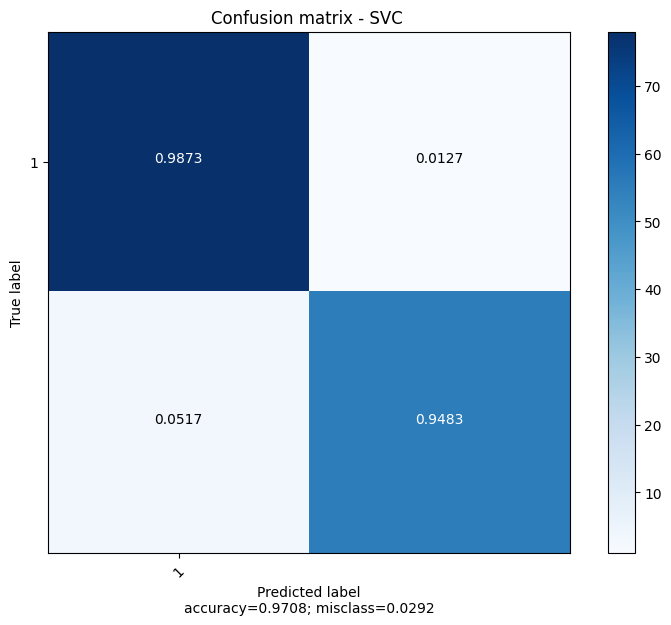

*******************


C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


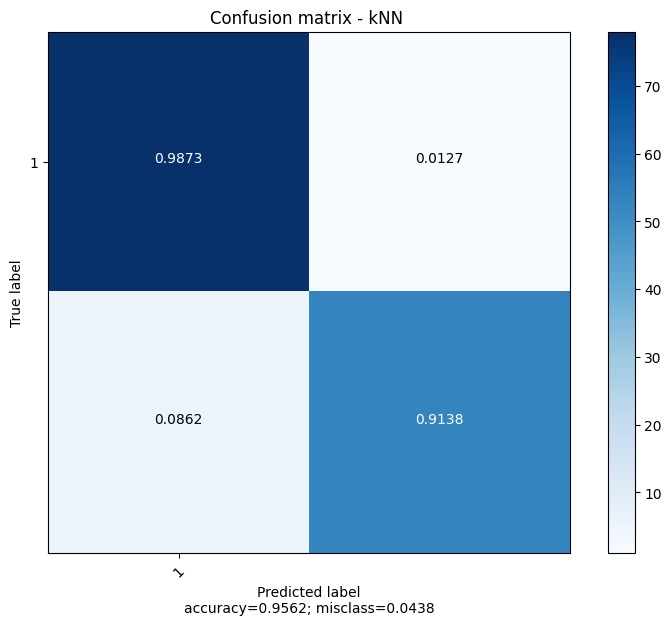

*******************


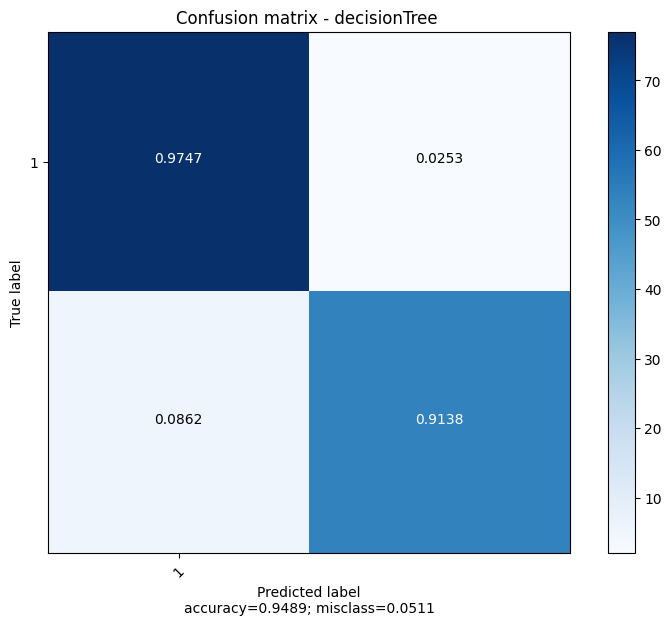

*******************


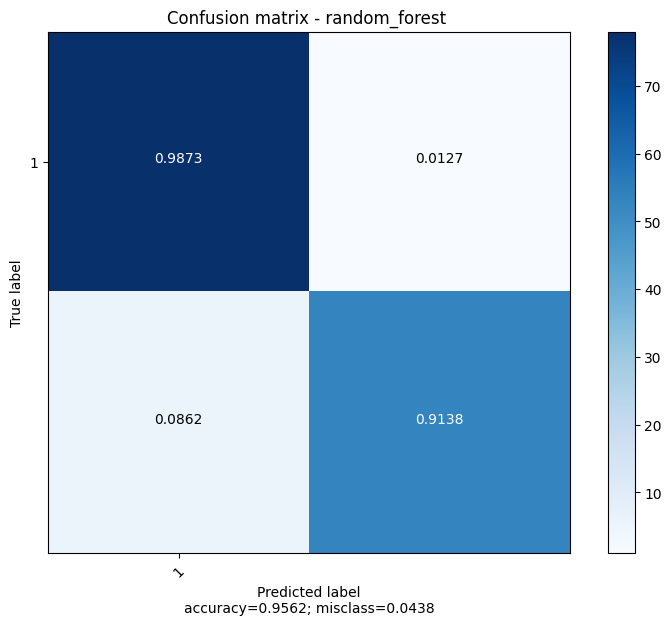

*******************


C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\marti\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\mart

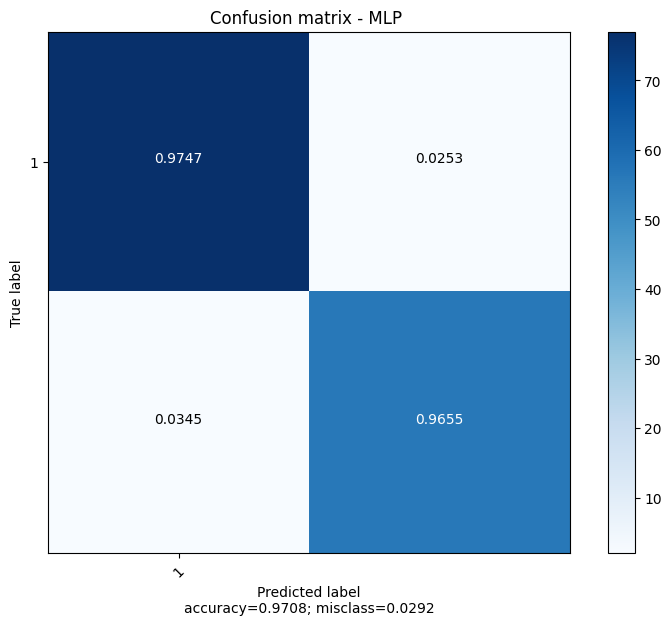

In [14]:

metric_accuracies  = np.zeros([K_outer,1]) #len(classifiers)])
metric_precision   = np.zeros([K_outer,1]) #len(classifiers)])
metric_f1score     = np.zeros([K_outer,1]) #len(classifiers)])
metric_mcc         = np.zeros([K_outer,1]) #len(classifiers)])

metric_accuracies_test  = np.zeros([len(classifiers)])
metric_precision_test   = np.zeros([len(classifiers)])
metric_f1score_test     = np.zeros([len(classifiers)])
metric_mcc_test         = np.zeros([len(classifiers)])
metric_sensitivity_test = np.zeros([len(classifiers)])
metric_auc_test         = np.zeros([len(classifiers)])

optimization = True

with open(os.path.join(path_results,'experiment_summary.txt'), mode='w', encoding="utf-8") as f:

	
	print(f"PCA: {pcago}",file=f)
	print(f"Hyperparameter tuning: {optimization}",file=f)

	print(f"***** CLASSIFIER *****",file=f)
	
	for number_classifier in range(len(classifiers)):

		print('*******************')
		cl_name = clf_names[number_classifier]
		print(f'Classificatore: {cl_name}\n',file = f)
		
		if cl_name == 'kNN':
			# Parameters to be optimized for the K-NEAREST NEIGHBOUR classifier
			n_neighbors = list(range(1, 200))
			param_grid = {'n_neighbors': n_neighbors, 'algorithm':['ball_tree', 'kd_tree', 'brute']}
		if cl_name == 'SVC':
			# Parameters to be optimized for the support vector machine classifier
			C_range = np.logspace(-3, 1, 70)
			gamma_range = np.logspace(-4,1,70)
			param_grid = {'C': C_range, 'gamma':gamma_range}
		if cl_name == 'decisionTree':
			# Parameters to be optimized for the decision tree classifier
			param_grid = {'criterion':['gini', 'entropy', 'log_loss']}
		if cl_name == 'random_forest':
			# Parameters to be optimized for the random forest classifier
			n_estimators_range = range(30,800,5)
			param_grid = {'n_estimators': n_estimators_range, 'criterion':['gini', 'entropy', 'log_loss']}
		if cl_name == 'MLP':
			# Parameters to be optimized for the random forest classifier
			param_grid = {'activation':['relu', 'identity', 'logistic', 'tanh'], 'solver':['lbfgs', 'sgd', 'adam']}

		print(f'Parameters to be optimized for the classifier are: {param_grid}\n',file = f)

		
		pathCl = os.path.join(path_results,cl_name)
		os.makedirs(pathCl, exist_ok=True)
	
		clf_counter = 0
	
		  # Train/Test loop - OUTER LOOP
		for train_index, valid_index in outer_cv.split(X_train, y_train):

			#print("")
			#print(f'Outer cycle equal to. {clf_counter}')

			# Outer Fold Split
			X_train_out, X_valid = X_train[train_index], X_train[valid_index]
			y_train_out, y_valid = y_train[train_index], y_train[valid_index]

			classifier = classifiers[number_classifier]

			if optimization:
				classifier = GridSearchCV(estimator = classifier,param_grid = param_grid,cv = 5,scoring = 'matthews_corrcoef')

				

			classifier.fit(X_train_out,y_train_out)
			print(f'Best Parameters are: {classifier.best_params_}',file = f) 

			dump(classifier,pathCl + '/' + cl_name + f'{clf_counter}.joblib') #save the best model

			y_pred = classifier.predict(X_valid)

			cm  = confusion_matrix(y_valid, y_pred)
			#print(cm)
			metric_accuracies[clf_counter] = accuracy_score(y_valid, y_pred)
			metric_precision [clf_counter] = precision_score(y_valid, y_pred)
			metric_f1score   [clf_counter] = f1_score(y_valid, y_pred)
			metric_mcc       [clf_counter] = matthews_corrcoef(y_valid, y_pred)

			clf_counter += 1


		#print(metric_mcc)
		idx = np.argmax(metric_mcc,axis=0)
		
		best_est = load(pathCl + '/' + cl_name + f'{idx[0]}.joblib')
		prediction_test = best_est.predict(X_test)
		cm_test  = confusion_matrix(y_test, prediction_test)

		plot_confusion_matrix(cm_test,
   	                      np.arange(1,2,1), #labels,
   	                      title=f'Confusion matrix - {cl_name} ',
   	                      cmap=None,
   	                      normalize=True)

		metric_accuracies_test  [number_classifier] = accuracy_score(y_test, prediction_test)
		metric_precision_test   [number_classifier] = precision_score(y_test, prediction_test)
		metric_f1score_test     [number_classifier] = f1_score(y_test, prediction_test)
		metric_mcc_test         [number_classifier] = matthews_corrcoef(y_test, prediction_test)
		metric_sensitivity_test [number_classifier] = recall_score(y_test, prediction_test)
		metric_auc_test         [number_classifier] = roc_auc_score(y_test, prediction_test)

		print(f'Performance on the data of the test set:\n', file = f)
		print(f"Confusion matrix:  {cm_test}",file = f)
		print(f"Accuracy score:    {metric_accuracies_test[number_classifier]}\n",file=f)
		print(f"Precision score:   {metric_precision_test[number_classifier]}\n",file=f)
		print(f"F1 score:          {metric_f1score_test[number_classifier]}\n",file=f)
		print(f"MCC score:         {metric_mcc_test[number_classifier]}\n",file=f)
		print(f"Sensitivity score: {metric_sensitivity_test[number_classifier]}\n",file=f)
		print(f"Area Under the Receiver Operating Characteristic Curve (ROC AUC): {metric_auc_test[number_classifier]}\n",file=f)
		print(f"**********",file=f)

